#Por día

In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\esaez\NotesQA\CSVs\devoluciones_01_a_6_nov.csv', encoding='utf-8',)

df

,folio_recepcion,descripcion,fecha_recepcion
0,2024403095,COTIZ < LIQ DE SUELDO,2024-11-05
1,2024414332,COTIZ < LIQ DE SUELDO,2024-11-05
2,2024413643,COTIZ < LIQ DE SUELDO,2024-11-04
3,2024408812,COTIZ < LIQ DE SUELDO,2024-11-04
4,2024409083,COTIZ < LIQ DE SUELDO,2024-11-04
...,...,...,...
134,2024413753,NO IMAGENES CON API,2024-11-04
135,2024404294,NO IMAGENES CON API,2024-11-05
136,2024414352,NO IMAGENES CON API,2024-11-04
137,2024413986,NO IMAGENES CON API,2024-11-04


In [2]:
df['fecha_recepcion'].unique()

array(['2024-11-05', '2024-11-04'], dtype=object)

In [3]:
# Convertir la columna fecha_visacion a tipo datetime
df['fecha_recepcion'] = pd.to_datetime(df['fecha_recepcion'])

df

,folio_recepcion,descripcion,fecha_recepcion
0,2024403095,COTIZ < LIQ DE SUELDO,2024-11-05
1,2024414332,COTIZ < LIQ DE SUELDO,2024-11-05
2,2024413643,COTIZ < LIQ DE SUELDO,2024-11-04
3,2024408812,COTIZ < LIQ DE SUELDO,2024-11-04
4,2024409083,COTIZ < LIQ DE SUELDO,2024-11-04
...,...,...,...
134,2024413753,NO IMAGENES CON API,2024-11-04
135,2024404294,NO IMAGENES CON API,2024-11-05
136,2024414352,NO IMAGENES CON API,2024-11-04
137,2024413986,NO IMAGENES CON API,2024-11-04


In [4]:
#df['fecha_recepcion'] = df['fecha_recepcion'].dt.to_period('')

# Reemplazar NaN en la columna 'descripcion' con la cadena "procesados"
#df['descripcion'].fillna("PROCESADOS NO DEVUELTOS", inplace=True)

not_includes_dates = ['2024-10-05', '2024-10-06', '2024-10-13']

# not_includes_dates_con_tiempo = [f'{fecha} 00:00:00' for fecha in not_includes_dates]


filtro_fecha = (df['fecha_recepcion'] >= '2023-08') & (~df['fecha_recepcion'].isin(not_includes_dates))

# Aplicar el filtro para seleccionar solo las filas a partir de agosto de 2023
df = df[filtro_fecha]

# Contar la cantidad de errores por fecha
# df.drop(columns=['inicio_carga'], inplace=True)
error_count_by_date = df.groupby(['fecha_recepcion', 'descripcion']).count().unstack(fill_value=0).reset_index()



error_count_by_date

fecha_recepcion       folio_recepcion                     \
descripcion                 COTIZ < LIQ DE SUELDO FALTA COTIZ. SALUD   
0                2024-11-04                    13                  3   
1                2024-11-05                    67                 16   

                                                                            \
descripcion FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL   
0                                                            0               
1                                                            3               

                                              
descripcion NO IMAGENES CON API RENTA = TOPE  
0                            23            1  
1                             2           11

In [5]:

# Agregar una columna que indique la suma de los errores por fecha
error_count_by_date['TOTAL_PUBLICADOS'] = error_count_by_date.iloc[:, 1:].sum(axis=1)

error_percentages = error_count_by_date.copy()
for col in error_percentages.columns[1:-1]:
    error_percentages[col] = (error_percentages[col] / error_percentages['TOTAL_PUBLICADOS']) * 100


error_percentages

fecha_recepcion       folio_recepcion                     \
descripcion                 COTIZ < LIQ DE SUELDO FALTA COTIZ. SALUD   
0                2024-11-04             32.500000           7.500000   
1                2024-11-05             67.676768          16.161616   

                                                                            \
descripcion FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL   
0                                                     0.000000               
1                                                     3.030303               

                                             TOTAL_PUBLICADOS  
descripcion NO IMAGENES CON API RENTA = TOPE                   
0                     57.500000     2.500000               40  
1                      2.020202    11.111111               99

Reemplaza las columnas de eror_percentages

In [6]:

# Mostrar el resultadod
#error_percentages.set_index('date', inplace=True)

#Con todas las descripciones
'''error_percentages.columns = 
    'date',
    'COTIZ < LIQ DE SUELDO',
    'ERROR AL DESCARGAR ALGUNAS IMAGENES',#nuevo
    'FALTA COTIZ. SALUD',
    'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL', 
    'NO DERECHO A PAGO SUBSIDIO',
    'NO HAY IMAGENES PARA DESCARGAR',
    'NO IMAGENES CON API',
    'NO PROCESADO MEDIPASS',
    'NO SE ENCUENTRA CODIGO AFP',
    'NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS',
    'RENTA = TOPE',
    'SOBRE 60 ANIOS SIN PENSION',#nuevo
   'TOTAL_errores']'''

#Descripciones seleccionadas
error_percentages.columns = ['date',
    'COTIZ < LIQ DE SUELDO',
    'FALTA COTIZ. SALUD',
    'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL',
    'NO DERECHO A PAGO SUBSIDIO',
    'NO HAY IMAGENES PARA DESCARGAR',
    'NO IMAGENES CON API',
    'NO SE ENCUENTRA CODIGO AFP',
    'RENTA = TOPE',
    'TOTAL_errores']




error_percentages

ValueError: Length mismatch: Expected axis has 7 elements, new values have 10 elements

In [16]:
error_percentages['date'] = pd.to_datetime(error_percentages['date'])

error_percentages.dtypes

date                                                              datetime64[ns]
COTIZ < LIQ DE SUELDO                                                    float64
FALTA COTIZ. SALUD                                                       float64
FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL           float64
NO DERECHO A PAGO SUBSIDIO                                               float64
NO HAY IMAGENES PARA DESCARGAR                                           float64
NO IMAGENES CON API                                                      float64
NO SE ENCUENTRA CODIGO AFP                                               float64
RENTA = TOPE                                                             float64
TOTAL_errores                                                              int64
dtype: object

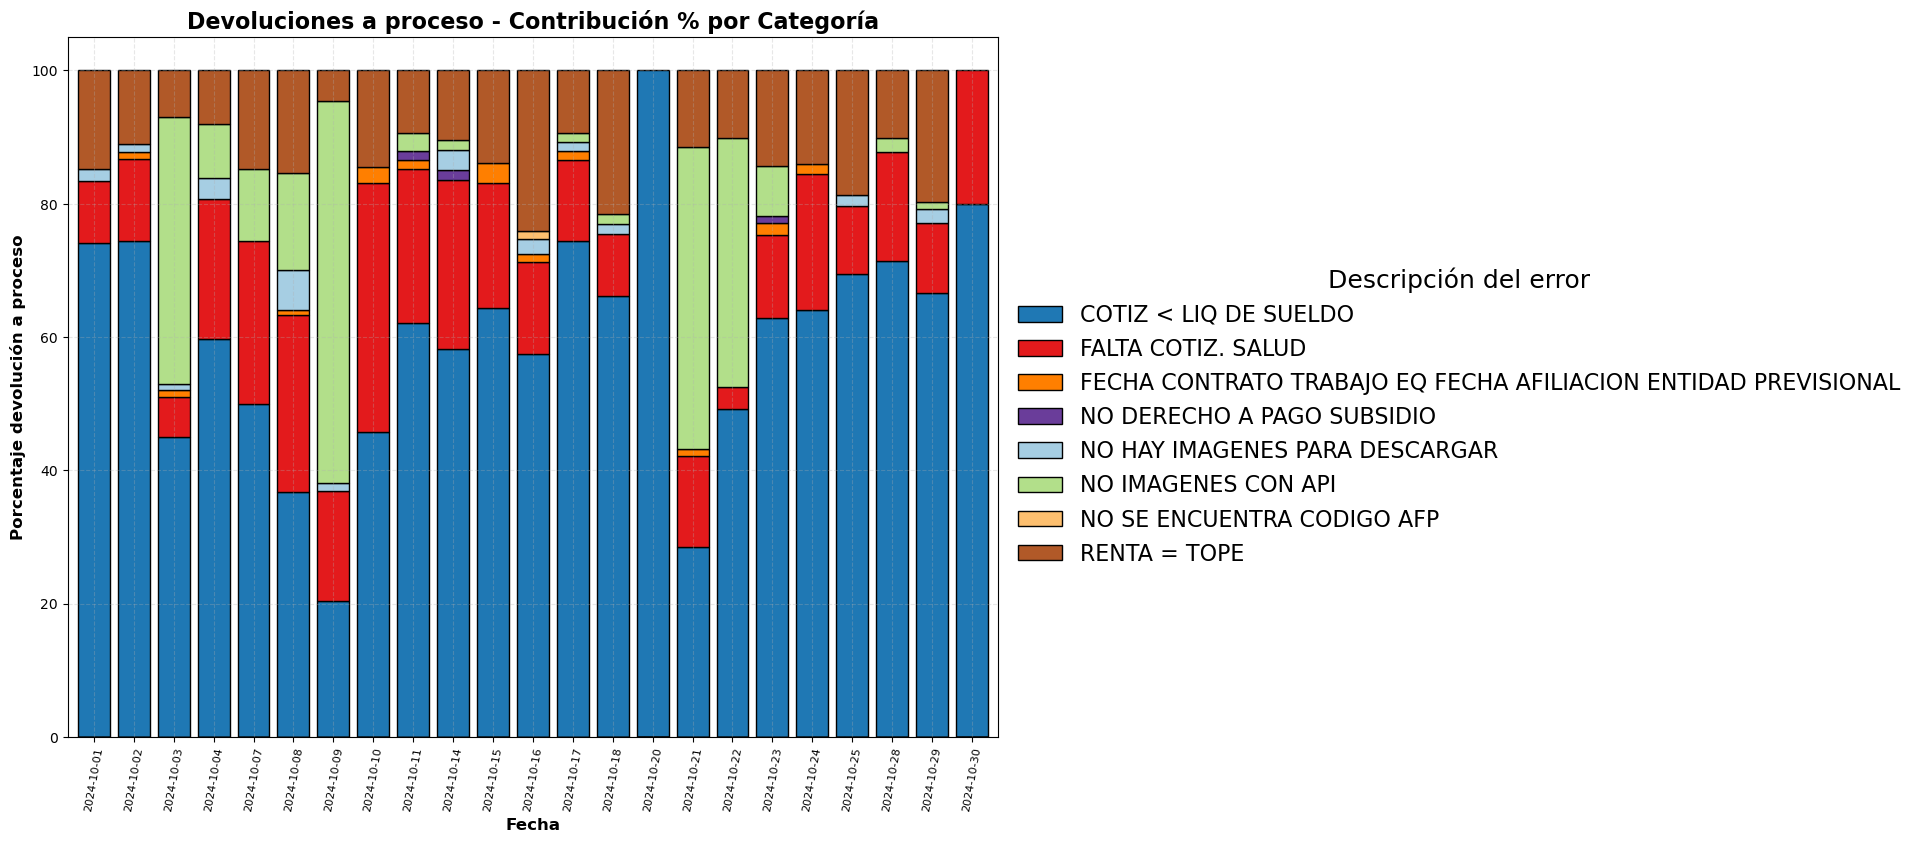

In [17]:
import matplotlib.pyplot as plt

from matplotlib.patches import PathPatch
from matplotlib.path import Path


error_percentages['date'] = error_percentages['date'].dt.strftime('%Y-%m-%d')

columnas_grafica = [
    'date',
    'COTIZ < LIQ DE SUELDO',
    #'ERROR AL DESCARGAR ALGUNAS IMAGENES',#nuevo
    'FALTA COTIZ. SALUD',
    'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL', 
    'NO DERECHO A PAGO SUBSIDIO',
    'NO HAY IMAGENES PARA DESCARGAR',
    'NO IMAGENES CON API',
    # 'NO PROCESADO MEDIPASS',
    'NO SE ENCUENTRA CODIGO AFP',
    # 'NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS',
    'RENTA = TOPE',
    #'SOBRE 60 ANIOS SIN PENSION'#nuevo
    ]



colores_distintivos = {
    'COTIZ < LIQ DE SUELDO': '#1f78b4',
    #'ERROR AL DESCARGAR ALGUNAS IMAGENES': '#33a02c',
    'FALTA COTIZ. SALUD': '#e31a1c',
    'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL': '#ff7f00',
    'NO DERECHO A PAGO SUBSIDIO': '#6a3d9a',
    'NO HAY IMAGENES PARA DESCARGAR': '#a6cee3',
    'NO IMAGENES CON API': '#b2df8a',
    # 'NO PROCESADO MEDIPASS': '#fb9a99',
    'NO SE ENCUENTRA CODIGO AFP': '#fdbf6f',
    # 'NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS': '#cab2d6',
    'RENTA = TOPE': '#b15928',
    #'SOBRE 60 ANIOS SIN PENSION': '#fdbf6f'
}
fig, ax = plt.subplots(figsize=(12, 8))

ax = error_percentages[columnas_grafica].plot(kind='bar', stacked=True, x='date', color=[colores_distintivos[col] for col in columnas_grafica[1:]], width=0.8, edgecolor='black', ax=ax)
plt.xlabel('Fecha', fontsize=12, fontweight='bold')
plt.ylabel('Porcentaje devolución a proceso', fontsize=12, fontweight='bold')
plt.title('Devoluciones a proceso - Contribución % por Categoría', fontsize=16, fontweight='bold')
plt.legend(title='Descripción del error', bbox_to_anchor=(1, 0.7), loc='upper left', ncol=1, fontsize=16, title_fontsize=18, frameon=False )

plt.grid(True, linestyle='--', alpha=0.3)
#ax.set_facecolor('lightgray')
plt.xticks(range(len(error_percentages['date'])), error_percentages['date'], rotation=80)

# Ajustar el espacio ocupado por la sección de barras
plt.subplots_adjust(bottom=0.005)

plt.tick_params(axis='x', labelsize=8)

plt.show()

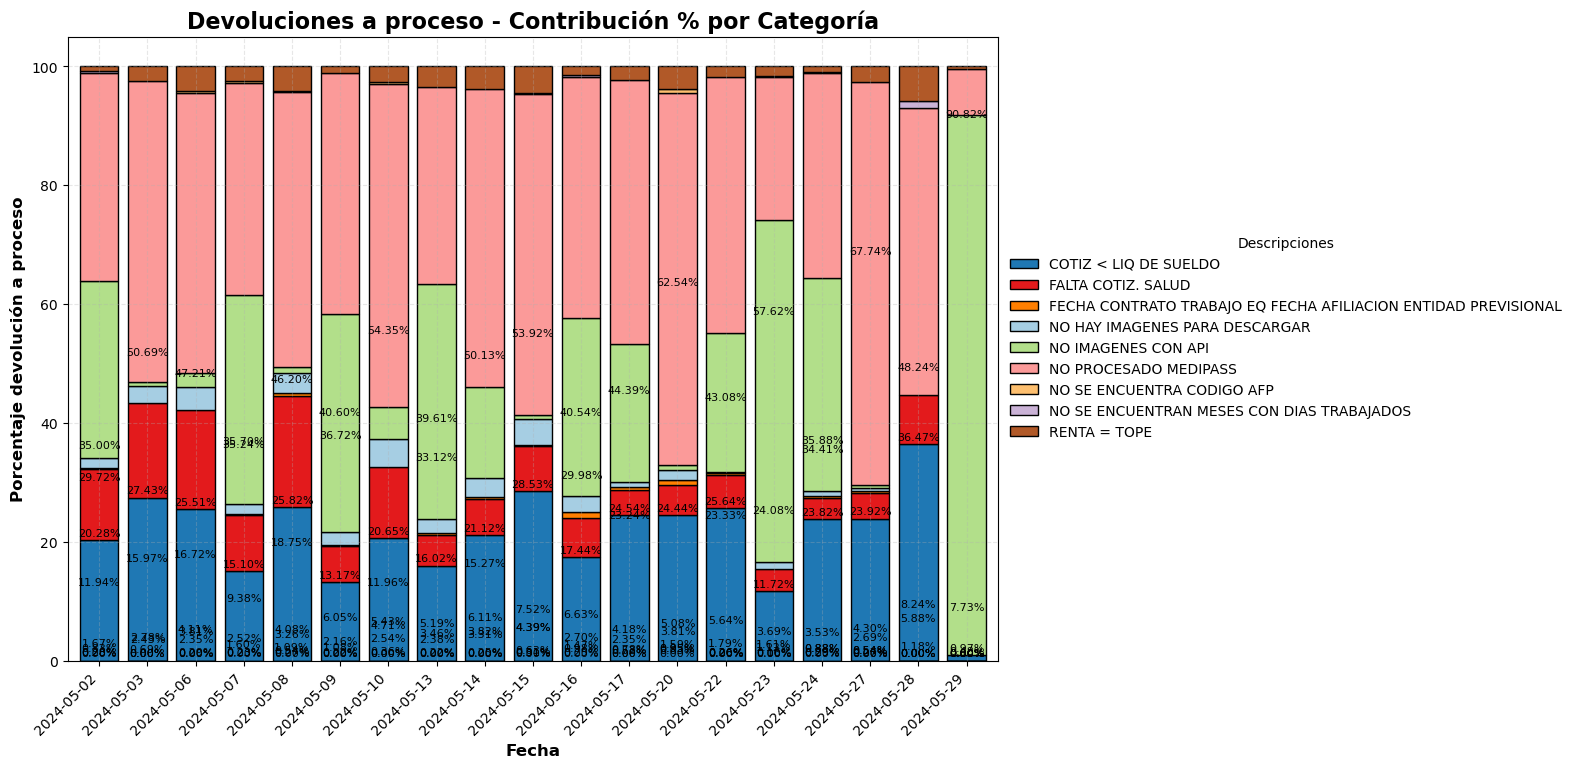

In [46]:
fig, ax = plt.subplots(figsize=(12, 8))

ax = error_percentages[columnas_grafica].plot(kind='bar', stacked=True, x='date', color=[colores_distintivos[col] for col in columnas_grafica[1:]], width=0.8, edgecolor='black', ax=ax)
plt.xlabel('Fecha', fontsize=12, fontweight='bold')
plt.ylabel('Porcentaje devolución a proceso', fontsize=12, fontweight='bold')
plt.title('Devoluciones a proceso - Contribución % por Categoría', fontsize=16, fontweight='bold', loc='center')  # Alinea el título al centro
plt.legend(title='Descripciones', bbox_to_anchor=(1, 0.7), loc='upper left', ncol=1, fontsize=10, frameon=False )

plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(range(len(error_percentages['date'])), error_percentages['date'], rotation=45, ha='right')  # Ajusta la rotación y alineación de las etiquetas del eje x
plt.yticks(fontsize=10)  # Aumenta el tamaño de la fuente en el eje y

# Ajustar el espacio ocupado por la sección de barras
plt.subplots_adjust(bottom=0.1)

# Añadir etiquetas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.show()

Este no duncion... Todavia


<Figure size 1200x800 with 0 Axes>

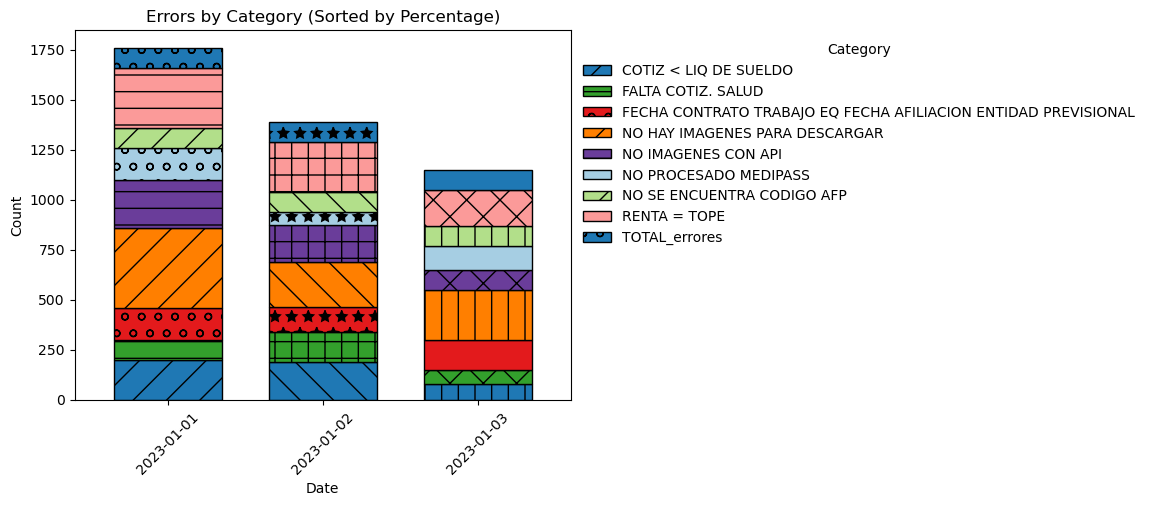

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Tu DataFrame
data = {'date': ['2023-01-01', '2023-01-02', '2023-01-03'],
        'COTIZ < LIQ DE SUELDO': [10, 15, 8],
        'FALTA COTIZ. SALUD': [5, 12, 7],
        'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL': [8, 10, 15],
        'NO HAY IMAGENES PARA DESCARGAR': [20, 18, 25],
        'NO IMAGENES CON API': [12, 15, 10],
        'NO PROCESADO MEDIPASS': [8, 5, 12],
        'NO SE ENCUENTRA CODIGO AFP': [5, 8, 10],
        'RENTA = TOPE': [15, 20, 18],
        'TOTAL_errores': [5, 8, 10]}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

# Calcular porcentajes solo para columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns
porcentajes_errores = df[columnas_numericas].div(df['TOTAL_errores'], axis=0) * 100

# Paleta de colores distintiva
colores_distintivos = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3', '#b2df8a', '#fb9a99']

# Ajustar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Graficar barras agrupadas con la paleta de colores distintivos y patrones
ax = porcentajes_errores.plot(kind='bar', stacked=True, color=colores_distintivos, edgecolor='black', width=0.7)

# Asignar patrones diferentes a cada categoría
patrones_colores = ['/', '\\', '|', '-', '+', 'x', 'o', '*']
for i, (colname, hatch) in enumerate(zip(porcentajes_errores.columns, patrones_colores)):
    for bar in ax.patches[i::len(porcentajes_errores.columns)]:
        bar.set_hatch(hatch)

# Cambiar el tamaño de las etiquetas del eje x
plt.xticks(range(len(df['date'])), df['date'].dt.strftime('%Y-%m-%d'), rotation=45, fontsize=10)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Errors by Category (Sorted by Percentage)')
plt.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left', ncol=1, fontsize=10, frameon=False)

plt.show()

